# Experiment: Probability of assignments throughout the training

In [1]:
import torch
import torch.optim as optim

from src.sat_generator import URGenerator
from src.solvers import random_solver, pg_solver

from src.train import train
import src.utils as utils

from src.utils import probs2plot

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
from os import listdir

In [2]:
config = {
    # Architecture
    "cell": 'GRU',
    "hidden_size": 128,
    "num_layers": 1,
    
    ## Embeddings
    "embedding_size": 64,

    ## Regularization
    "dropout": 0,

    # Training hyperparameters
    "accumulation_steps": 5,
    "lr": 0.00015,
    "baseline": -1,  # None, -1, 1, 2, 3, 4, 5
    "batch_size": 1,
    "permute_vars": False,
    "permute_seed": None, #2147483647
    "clip_grad": 1,
    "entropy_weight": 30,
    "num_episodes": 5000,
    "gpu": True,
    "verbose": 1,
    "raytune": False,
    "episode_log": True,  # True, False
    "episode_log_step": 100,  # 1, 2,... 
    "optimizer_log": False,
    "optimizer_log_step": 2,
    "experiment_name": 'exp1_prob_assignment',

    "checkpoint_dir": None,
    "data_dir": os.path.abspath('data/uf20-91/uf20-01.cnf')
}

# Run policy gradient solver
pg_solver(config, checkpoint_dir=config['checkpoint_dir'], data_dir=config['data_dir'])



Greedy actions (train): tensor([[1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1]])

Greedy actions (val): tensor([[1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1]])
Optim step 1000, Episode [5000/5000], Mean loss -54.8671,  Mean num sat 89.0000, Val loss 96.1964, Val num sat 89.0000


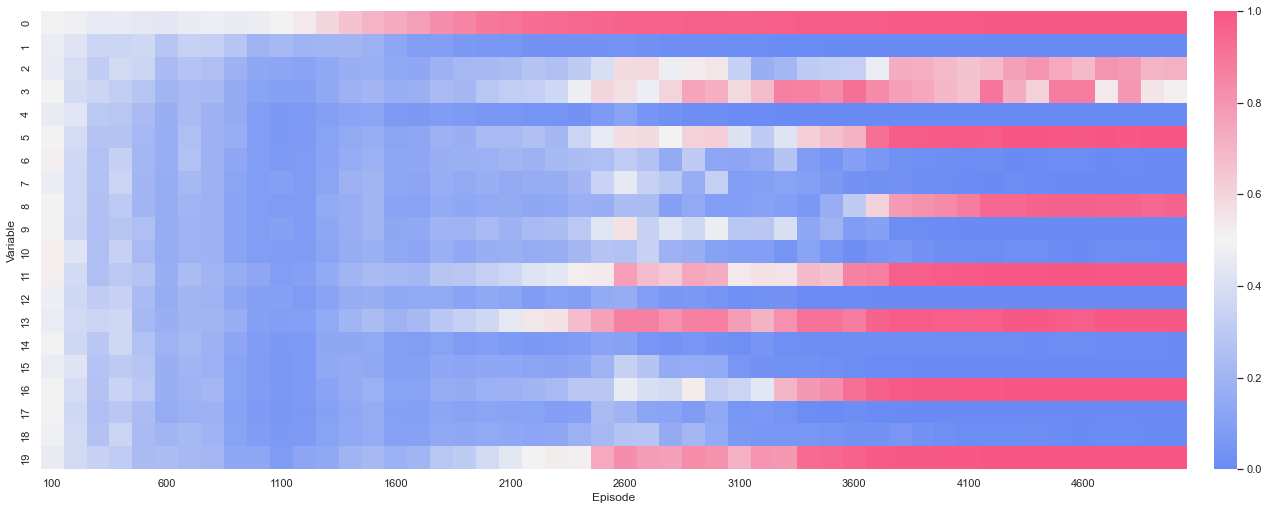

In [3]:
run_name = listdir("logs/" + config['experiment_name'])[0]
log_dir = "logs/" + config['experiment_name'] + "/" + run_name
img_path = 'img/' + config['experiment_name'] + '.png'
probs2plot(log_dir, img_path)